# Applied Deep Learning
# Group 8 - Insurance Fraud Detection coursework

## Task 1: The detection rate and the hit rate 

## Task 2: Insurance claims Dataset loading
## Data Pre-processing

In [68]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import tensorflow as tf

import keras_tuner as kt
import random

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, precision_score, roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import recall_score

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [70]:
# Loading the dataset
df_insurance_claims = pd.read_csv("./Insurance_claims.csv")

In [71]:
# Have a look at the first rows of the dataset
df_insurance_claims.head()

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0


In [72]:
# Check the datatype of null values of each column
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ReferenceId                      11530 non-null  int64  
 1   PolicyholderNumber               11530 non-null  int64  
 2   FirstPartyVehicleNumber          11035 non-null  float64
 3   ThirdPartyVehicleNumber          379 non-null    float64
 4   InsurerNotes                     9173 non-null   object 
 5   PolicyholderOccupation           11187 non-null  object 
 6   LossDate                         11530 non-null  object 
 7   FirstPolicySubscriptionDate      11530 non-null  object 
 8   ClaimCause                       11333 non-null  object 
 9   ClaimInvolvedCovers              11335 non-null  object 
 10  DamageImportance                 738 non-null    object 
 11  FirstPartyVehicleType            11518 non-null  object 
 12  ConnectionBetweenP

### Working on the missing values

In [73]:
# Check the missing values
df_insurance_claims.isna().sum()

ReferenceId                            0
PolicyholderNumber                     0
FirstPartyVehicleNumber              495
ThirdPartyVehicleNumber            11151
InsurerNotes                        2357
PolicyholderOccupation               343
LossDate                               0
FirstPolicySubscriptionDate            0
ClaimCause                           197
ClaimInvolvedCovers                  195
DamageImportance                   10792
FirstPartyVehicleType                 12
ConnectionBetweenParties           11432
LossPostCode                        1408
PolicyHolderPostCode                   0
PolicyWasSubscribedOnInternet          0
NumberOfPoliciesOfPolicyholder         0
FpVehicleAgeMonths                    12
EasinessToStage                        0
ClaimWihoutIdentifiedThirdParty        0
ClaimAmount                            0
LossHour                              94
PolicyHolderAge                       36
NumberOfBodilyInjuries                 0
FirstPartyLiabil

In [74]:
# List the columns with missing values
nan_cols = df_insurance_claims.columns[df_insurance_claims.isna().any()].tolist()
nan_cols

['FirstPartyVehicleNumber',
 'ThirdPartyVehicleNumber',
 'InsurerNotes',
 'PolicyholderOccupation',
 'ClaimCause',
 'ClaimInvolvedCovers',
 'DamageImportance',
 'FirstPartyVehicleType',
 'ConnectionBetweenParties',
 'LossPostCode',
 'FpVehicleAgeMonths',
 'LossHour',
 'PolicyHolderAge']

In [75]:
# checking if there are any claims where the vehicle numbers of the first and thrid parties are the same.
# There are none
df_insurance_claims.loc[df_insurance_claims["FirstPartyVehicleNumber"]==df_insurance_claims['ThirdPartyVehicleNumber']]

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud


In [76]:
# Check the unique values of column "Claim Cause"
df_insurance_claims['ClaimCause'].unique()

array(['CollisionWithAnimal', 'LossOfControl',
       'AccidentWithIdentifiedThirdParty', 'WindscreenDamage',
       'AccidentWithUnidentifiedThirdParty', 'Vandalism', 'TheftAttempt',
       'MultiVehicleCrash', nan, 'CollisionWithPedestrian', 'TotalTheft',
       'Fire', 'AccidentOrCollision', 'TheftOfExteriorElements', 'Storm',
       'LegalProtection', 'Hail', 'ForcesOfNature', 'Flood'], dtype=object)

In [77]:
# We do not know if there are missing values 
# because the data is really missing in the column of Occupation or because they are unemployed
# Hence, we want to check the unique values of column 'Policy Holder Occupation'
# There is a value named 'Unemployed' so the missing values are the ones really missing
df_insurance_claims['PolicyholderOccupation'].unique()

array(['CivilServant', 'Worker', 'Farmer', 'Employee', 'Executive',
       'Merchant', 'Retired', 'Student', 'Unemployed', nan,
       'SelfEmployed', 'HeadOfCompany'], dtype=object)

In [78]:
# Check the unique values of column 'InsurerNotes'
# The values of this column are full of text, which might require NLP
df_insurance_claims['InsurerNotes'].unique()

array(['avoids a cat and hits a garage pole With deductible XXX mail insured, from XX/XX, asking how to tow, because the water tank would be pierced, saw garage, have it well and have even started to do the work',
       "accident only expert contacts us to inform us of the change of garage no a= no PEC= expert informs deductible XXX? For settlement *Awaiting expert report for settlement *AS expert to request insured mother's report for follow-up payment report received => I pay the franchise deducted",
       'ae Miss/ for garage change A/ setting up EAD/ franchise XXX? while waiting for MEC Tiers to return to see if possible recourse in the absence of a countersigned statement, the insured will not be repaired until it is certain of the recourse on a roundabout. Tiers located on the left deflects and hits the vehicle of our insured KXXX Observation - I am exchanging decla opposing company Mrs. for follow-up: mail exchange decla address today report in estimate. insured call? for reco

In [79]:
# Check the value counts of column 'Damage Importance'
# There are only two levels: TotalLoss and Medium
df_insurance_claims['DamageImportance'].value_counts()

TotalLoss    677
Medium        61
Name: DamageImportance, dtype: int64

In [80]:
# Check the values counts of column 'Connection Between Parties'
df_insurance_claims['ConnectionBetweenParties'].value_counts()

SameAddress        80
SamePolice         12
SameEmail           3
SamePhone           2
SameBankAccount     1
Name: ConnectionBetweenParties, dtype: int64

In [81]:
# We are not sure if the missing data in the column 'ConnectionBetweenParties' 
# are really missing or because they do not have any connections
# We decided to add the value 'NoConnection' to the missing values
df_insurance_claims['ConnectionBetweenParties'] = df_insurance_claims['ConnectionBetweenParties'].replace(np.nan, 'noconnection')

In [82]:
# Check the values counts of columns ConnectionBetweenParties after imputing
df_insurance_claims['ConnectionBetweenParties'].value_counts()

noconnection       11432
SameAddress           80
SamePolice            12
SameEmail              3
SamePhone              2
SameBankAccount        1
Name: ConnectionBetweenParties, dtype: int64

In [83]:
# Check the number of unique values of column 'LossPostCode'
# There are 3005 unique values so it is hard to fill in the missing values
len(df_insurance_claims['LossPostCode'].unique())

3005

In [84]:
# Sort the unique values of Vehicle Age Months
sorted(df_insurance_claims['FpVehicleAgeMonths'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 7.0,
 15.0,
 26.0,
 28.0,
 29.0,
 35.0,
 39.0,
 41.0,
 55.0,
 59.0,
 63.0,
 75.0,
 77.0,
 80.0,
 84.0,
 89.0,
 90.0,
 92.0,
 95.0,
 112.0,
 113.0,
 121.0,
 122.0,
 125.0,
 147.0,
 148.0,
 151.0,
 154.0,
 162.0,
 164.0,
 166.0,
 168.0,
 171.0,
 174.0,
 175.0,
 178.0,
 183.0,
 189.0,
 194.0,
 200.0,
 201.0,
 204.0,
 206.0,
 207.0,
 211.0,
 212.0,
 219.0,
 220.0,
 223.0,
 226.0,
 227.0,
 228.0,
 229.0,
 234.0,
 235.0,
 236.0,
 237.0,
 239.0,
 240.0,
 241.0,
 245.0,
 246.0,
 247.0,
 248.0,
 249.0,
 250.0,
 254.0,
 255.0,
 262.0,
 265.0,
 266.0,
 267.0,
 276.0,
 277.0,
 279.0,
 288.0,
 291.0,
 294.0,
 296.0,
 304.0,
 305.0,
 306.0,
 308.0,
 313.0,
 314.0,
 324.0,
 326.0,
 330.0,
 340.0,
 352.0,
 373.0,
 377.0,
 416.0,
 421.0,
 nan,
 -4.0,
 -1.0,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 27.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 36.0,
 37.0,
 38.0,
 40.0,
 42.0,
 43.0,
 44.0

In [85]:
# Impute the missing values of column FpVehicleAgeMonths with a number out of the positive range, for example, we chose -111 in this case 
df_insurance_claims['FpVehicleAgeMonths'] = df_insurance_claims['FpVehicleAgeMonths'].replace(np.nan, -111)

In [86]:
# Checking the correlations of Fraud status with other features
df_insurance_claims.corr(method ='pearson')

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_42773/943198488.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_insurance_claims.corr(method ='pearson')


,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
ReferenceId,1.000000,0.209116,0.282068,0.271636,-0.008110,0.012979,-0.001726,0.105193,0.104887,-0.065860,-0.054491,0.021388,-0.058762,-0.076372,-0.045789
PolicyholderNumber,0.209116,1.000000,0.793369,0.327929,0.190479,-0.329618,-0.019056,0.023667,-0.007363,0.042668,-0.025072,0.112914,-0.025922,-0.009534,0.022482
FirstPartyVehicleNumber,0.282068,0.793369,1.000000,0.404662,0.196522,-0.223095,-0.026850,0.021291,-0.002183,0.042396,-0.020693,0.085038,-0.026183,-0.021531,0.016646
ThirdPartyVehicleNumber,0.271636,0.327929,0.404662,1.000000,0.157980,-0.193787,0.095110,-0.036111,0.033128,0.065934,-0.130910,-0.015475,0.027601,-0.099609,-0.031976
PolicyWasSubscribedOnInternet,-0.008110,0.190479,0.196522,0.157980,1.000000,-0.186533,-0.007225,-0.047005,-0.056639,-0.014952,0.017985,-0.141683,0.001283,0.008203,0.024539
NumberOfPoliciesOfPolicyholder,0.012979,-0.329618,-0.223095,-0.193787,-0.186533,1.000000,0.035729,0.012080,0.036546,-0.020861,0.000018,-0.026783,0.013496,-0.031755,-0.036993
FpVehicleAgeMonths,-0.001726,-0.019056,-0.026850,0.095110,-0.007225,0.035729,1.000000,-0.013723,-0.071952,-0.096283,-0.051698,-0.097592,0.027982,0.005526,-0.000535
EasinessToStage,0.105193,0.023667,0.021291,-0.036111,-0.047005,0.012080,-0.013723,1.000000,0.702388,-0.161865,-0.453227,0.043831,-0.381293,-0.179213,-0.024864
ClaimWihoutIdentifiedThirdParty,0.104887,-0.007363,-0.002183,0.033128,-0.056639,0.036546,-0.071952,0.702388,1.000000,-0.140430,-0.405504,0.023612,-0.134350,-0.266417,-0.026088
ClaimAmount,-0.065860,0.042668,0.042396,0.065934,-0.014952,-0.020861,-0.096283,-0.161865,-0.140430,1.000000,0.159222,0.020991,0.181512,0.231267,0.083520


In [87]:
# Convert the dates to datetime objects
df_insurance_claims["LossDate"] = pd.to_datetime(df_insurance_claims["LossDate"])
df_insurance_claims["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims["FirstPolicySubscriptionDate"])

In [88]:
# Calculate the days between First Policy Subcription Date and Loss Date, name that column 'Days'
df_insurance_claims["Days"] = df_insurance_claims["LossDate"] - df_insurance_claims["FirstPolicySubscriptionDate"]
df_insurance_claims["Days"] = pd.to_numeric(df_insurance_claims["Days"].dt.days, downcast='integer')

In [89]:
df_insurance_claims = df_insurance_claims.astype({"Days": "int64"})

In [90]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ReferenceId                      11530 non-null  int64         
 1   PolicyholderNumber               11530 non-null  int64         
 2   FirstPartyVehicleNumber          11035 non-null  float64       
 3   ThirdPartyVehicleNumber          379 non-null    float64       
 4   InsurerNotes                     9173 non-null   object        
 5   PolicyholderOccupation           11187 non-null  object        
 6   LossDate                         11530 non-null  datetime64[ns]
 7   FirstPolicySubscriptionDate      11530 non-null  datetime64[ns]
 8   ClaimCause                       11333 non-null  object        
 9   ClaimInvolvedCovers              11335 non-null  object        
 10  DamageImportance                 738 non-null    object   

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_42773/3239715344.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_insurance_claims.corr(), cmap="YlGnBu")


<AxesSubplot:>

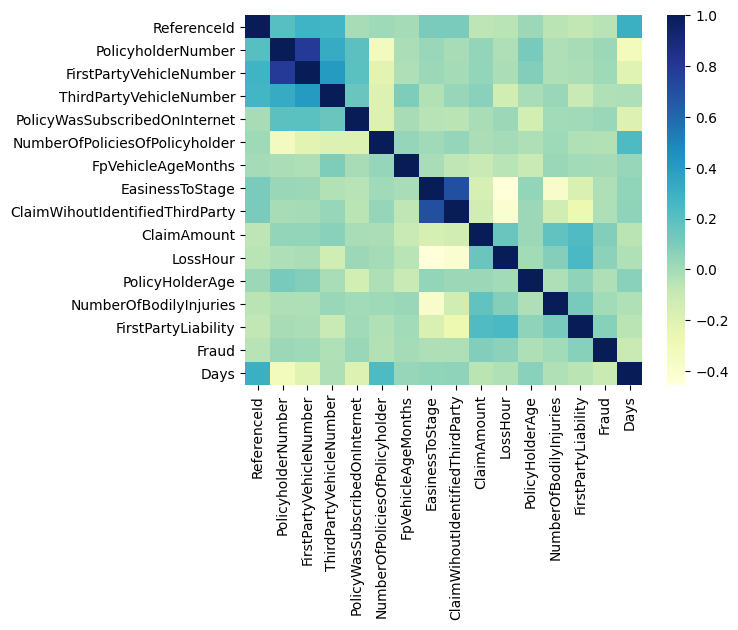

In [91]:
# Checking the correlations via the correlation heatmap
sns.heatmap(df_insurance_claims.corr(), cmap="YlGnBu")

In [92]:
# Are the policy numbers unique, or are there any people who filed claims multiple times
def get_uniqueness(df, column_names):
    for column_name in column_names:
        print("{}: Column length: {}, unique values: {}".format(column_name, len(df[column_name]), df[column_name].nunique()))

get_uniqueness(df_insurance_claims, ["PolicyholderNumber"])

# Create a new column with count of claims made by the same policy holder.
# Multiple claims by the same policy holder may likely indicate a fraud.
counts_policy_holder = df_insurance_claims['PolicyholderNumber'].value_counts()
df_insurance_claims["PolicyHolderCount"] = df_insurance_claims["PolicyholderNumber"].map(counts_policy_holder)
df_insurance_claims[["PolicyholderNumber", "PolicyHolderCount"]]

PolicyholderNumber: Column length: 11530, unique values: 9404


,PolicyholderNumber,PolicyHolderCount
0,531112,1
1,87170,2
2,98706,2
3,38240,1
4,11339,4
...,...,...
11525,452486,1
11526,581104,1
11527,817231,1
11528,321534,2


In [93]:
# # Column ClaimInvolvedCovers contains a space sepaated list of strings indicating the covers that the individual took
# # We convert this into onehot encoded columns
# one_hot = pd.get_dummies(df_insurance_claims["ClaimInvolvedCovers"].str.split(" ", expand=True).stack()).groupby(level=0).sum()
# df_insurance_claims = pd.concat([df_insurance_claims, one_hot], axis=1)

We decided to drop these columns based on the below main reasons: 
- Those are the unique numbers such as IDs (ReferenceID, PolicyholderNumber, FirstPartyVehicleNumber, ThirdPartyVehicleNumber, InsurerNotes)
- The columns have too many missing values (DamageImportance, ConnectionBetweenParties)
- The values are the postcodes of the addresses (LossPostCode, PolicyHolderPostCode)


In [94]:
# Remove the columns that have too many missing values and unnecessary comlumns such as Reference ID, PolicyHolderPostcode
df_insurance_claims.drop(columns = ["ReferenceId",                     # unique 
                                    "PolicyholderNumber",              # unique
                                    "FirstPartyVehicleNumber",         # unique    
                                    "ThirdPartyVehicleNumber",         # unique
                                    "InsurerNotes",                    # dropping for now
                                    "DamageImportance",                # too many nans
                                    #"ConnectionBetweenParties",        # we can fill
                                    "LossPostCode",                    # not necessary
                                    "PolicyHolderPostCode",            # not necessary
                                    # "LossDate",
                                    # "FirstPolicySubscriptionDate"             
                                    ], inplace=True)

In [95]:
# Drop the duplicate rows
df_insurance_claims.drop_duplicates(inplace=True)
df_insurance_claims

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,ConnectionBetweenParties,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,Days,PolicyHolderCount
0,CivilServant,2019-01-02,2018-06-18,CollisionWithAnimal,MaterialDamages ActLiability,Car,noconnection,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,198,1
1,Worker,2019-01-02,2017-06-29,LossOfControl,MaterialDamages ActLiability,Car,noconnection,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,552,2
2,Worker,2019-01-02,2017-02-05,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car,noconnection,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,696,2
3,CivilServant,2019-01-02,2017-01-21,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car,noconnection,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,711,1
4,Farmer,2019-01-02,2018-01-13,AccidentWithIdentifiedThirdParty,ActLiability,Car,noconnection,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,354,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,2021-02-17,2019-03-15,WindscreenDamage,Windscreen,Car,noconnection,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,705,1
11526,Employee,2021-03-07,2017-07-20,WindscreenDamage,Windscreen,Car,noconnection,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,1326,1
11527,Employee,2021-03-15,2020-09-30,WindscreenDamage,Windscreen,Car,noconnection,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,166,1
11528,CivilServant,2021-03-06,2018-12-28,WindscreenDamage,Windscreen,Car,noconnection,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,799,2


In [96]:
# Compare the 2 Fraud statuses: 
#sns.pairplot(df_new, hue='Fraud')

#We can see from the plot that the dataset is unbalanced. 


In [97]:
# # reset the indices in the data
# df_insurance_claims.reset_index(inplace=True)

# Task 3
# Model 1

#### For the model 1, we want to find out which claims are suspicious if the incident occurs within t days of subscription date. Therefore, we only need columns:
- FirstPolicySubscriptionDate
- LossDate
- Days
- Fraud

In [103]:
df_insurance_claims_model_1 = df_insurance_claims[["LossDate", "FirstPolicySubscriptionDate", "Fraud", "Days"]]
df_insurance_claims_model_1

,LossDate,FirstPolicySubscriptionDate,Fraud,Days
0,2019-01-02,2018-06-18,0,198
1,2019-01-02,2017-06-29,0,552
2,2019-01-02,2017-02-05,0,696
3,2019-01-02,2017-01-21,0,711
4,2019-01-02,2018-01-13,0,354
...,...,...,...,...
11525,2021-02-17,2019-03-15,0,705
11526,2021-03-07,2017-07-20,0,1326
11527,2021-03-15,2020-09-30,0,166
11528,2021-03-06,2018-12-28,0,799


In [122]:
df_insurance_claims_model_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11516 entries, 0 to 11529
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LossDate                     11516 non-null  datetime64[ns]
 1   FirstPolicySubscriptionDate  11516 non-null  datetime64[ns]
 2   Fraud                        11516 non-null  int64         
 3   Days                         11516 non-null  int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 707.9 KB


#### Determine the range of the t days

In [115]:
df_fraud = df_insurance_claims_model_1.loc[df_insurance_claims_model_1["Fraud"] == 1]

In [116]:
df_fraud

,LossDate,FirstPolicySubscriptionDate,Fraud,Days
523,2019-02-22,2019-02-22,1,0
653,2019-02-28,2019-02-28,1,0
692,2019-03-06,2019-02-11,1,23
697,2019-03-02,2019-02-28,1,2
772,2019-03-05,2019-02-22,1,11
...,...,...,...,...
9768,2020-10-03,2020-10-01,1,2
10147,2020-11-03,2020-11-01,1,2
10166,2020-11-04,2020-11-02,1,2
10181,2020-10-05,2020-10-05,1,0


In [123]:
# The maximum value of t
df_fraud["Days"].max()

1201

In [124]:
# The minimum value of t
df_fraud["Days"].min()

0

In [125]:
# Set up the range of t days
t = range(1202)

#### We calculated the detection rate and hit rate based on the each t days
- The calculation formula of detection rate is:
$$
  Detection\ Rate =\frac{The\ Number\ of\ Detection}{Total\ Number\ of\ Observation}\, *100\%
$$
- The calculation formula of hit rate is:
$$
  Hit\ Rate =\frac{The\ Number\ of\ Real\ Fraud}{The\ Number\ of\ Detection}\, *100\%
$$


In [126]:
def detect_fraudulent_claims_model_1(t, df_datasets):
    
    # All_detection rate
    d = []
    # All hit rate
    h = []
    # All predictions 
    Y_all_prediction = []
    
    for i in t:
        # All prediction based on each t
        y_prediction = []
        # The number of detection
        a = 0
        # The number of real fraud
        b = 0
        
        for o in range(len(df_datasets)):
            if df_datasets["Days"][o] <= i:
                a = a + 1
                y = 1
                y_prediction.append(y)
                if df_datasets["Fraud"][o] == 1:
                    b = b + 1
            else:
                y = 0
                y_prediction.append(y)
        
        detection_rate = round((a / len(df_datasets))*100, 2)
        d.append(detection_rate)
        hit_rate = round((b / a)*100, 2)
        h.append(hit_rate)
        
        Y_all_prediction.append(y_prediction)

    
    return d, h, Y_all_prediction

In [127]:
d, h, Y_all_prediction = detect_fraudulent_claims_model_1(t, df_insurance_claims_model_1)

KeyError: 1490

# Task 4
# Model 2: Decision Tree

In [128]:
# Have a glimpse at the dataset
df_insurance_claims

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,ConnectionBetweenParties,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,Days,PolicyHolderCount
0,CivilServant,2019-01-02,2018-06-18,CollisionWithAnimal,MaterialDamages ActLiability,Car,noconnection,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,198,1
1,Worker,2019-01-02,2017-06-29,LossOfControl,MaterialDamages ActLiability,Car,noconnection,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,552,2
2,Worker,2019-01-02,2017-02-05,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car,noconnection,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,696,2
3,CivilServant,2019-01-02,2017-01-21,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car,noconnection,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,711,1
4,Farmer,2019-01-02,2018-01-13,AccidentWithIdentifiedThirdParty,ActLiability,Car,noconnection,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,354,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,2021-02-17,2019-03-15,WindscreenDamage,Windscreen,Car,noconnection,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,705,1
11526,Employee,2021-03-07,2017-07-20,WindscreenDamage,Windscreen,Car,noconnection,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,1326,1
11527,Employee,2021-03-15,2020-09-30,WindscreenDamage,Windscreen,Car,noconnection,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,166,1
11528,CivilServant,2021-03-06,2018-12-28,WindscreenDamage,Windscreen,Car,noconnection,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,799,2


In [129]:
df_insurance_claims.isna().sum()

PolicyholderOccupation             340
LossDate                             0
FirstPolicySubscriptionDate          0
ClaimCause                         191
ClaimInvolvedCovers                189
FirstPartyVehicleType               12
ConnectionBetweenParties             0
PolicyWasSubscribedOnInternet        0
NumberOfPoliciesOfPolicyholder       0
FpVehicleAgeMonths                   0
EasinessToStage                      0
ClaimWihoutIdentifiedThirdParty      0
ClaimAmount                          0
LossHour                            94
PolicyHolderAge                     36
NumberOfBodilyInjuries               0
FirstPartyLiability                  0
Fraud                                0
Days                                 0
PolicyHolderCount                    0
dtype: int64

In [130]:
# Remove the columns that have too many missing values and unnecessary comlumns such as Reference ID, PolicyHolderPostcode
df_insurance_claims.drop(columns = [
                                    "LossDate",
                                    "FirstPolicySubscriptionDate"             
                                    ], inplace=True)

In [131]:
# Removing the mising values
df_insurance_claims = df_insurance_claims[(df_insurance_claims.PolicyholderOccupation.notnull()) &
                                          (df_insurance_claims.ClaimCause.notnull()) &
                                          (df_insurance_claims.ClaimInvolvedCovers.notnull()) &
                                          (df_insurance_claims.FirstPartyVehicleType.notnull()) &
                                          (df_insurance_claims.FpVehicleAgeMonths.notnull()) &
                                          (df_insurance_claims.LossHour.notnull()) &
                                          (df_insurance_claims.PolicyHolderAge.notnull())
                                          ].reset_index()

In [132]:
df_insurance_claims_clean = df_insurance_claims.drop(columns = ["index"])
df_insurance_claims_clean

,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,ConnectionBetweenParties,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,Days,PolicyHolderCount
0,CivilServant,CollisionWithAnimal,MaterialDamages ActLiability,Car,noconnection,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,198,1
1,Worker,LossOfControl,MaterialDamages ActLiability,Car,noconnection,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,552,2
2,Worker,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car,noconnection,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,696,2
3,CivilServant,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car,noconnection,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,711,1
4,Farmer,AccidentWithIdentifiedThirdParty,ActLiability,Car,noconnection,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,354,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,Employee,WindscreenDamage,Windscreen,Car,noconnection,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,705,1
10885,Employee,WindscreenDamage,Windscreen,Car,noconnection,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,1326,1
10886,Employee,WindscreenDamage,Windscreen,Car,noconnection,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,166,1
10887,CivilServant,WindscreenDamage,Windscreen,Car,noconnection,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,799,2


In [133]:
# Check the datatype of each column
df_insurance_claims_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PolicyholderOccupation           10889 non-null  object 
 1   ClaimCause                       10889 non-null  object 
 2   ClaimInvolvedCovers              10889 non-null  object 
 3   FirstPartyVehicleType            10889 non-null  object 
 4   ConnectionBetweenParties         10889 non-null  object 
 5   PolicyWasSubscribedOnInternet    10889 non-null  int64  
 6   NumberOfPoliciesOfPolicyholder   10889 non-null  int64  
 7   FpVehicleAgeMonths               10889 non-null  float64
 8   EasinessToStage                  10889 non-null  float64
 9   ClaimWihoutIdentifiedThirdParty  10889 non-null  int64  
 10  ClaimAmount                      10889 non-null  float64
 11  LossHour                         10889 non-null  float64
 12  PolicyHolderAge   

In [134]:
# Check categorical data
df_insurance_claims_clean[["PolicyholderOccupation","ClaimCause", 'ClaimInvolvedCovers', "FirstPartyVehicleType"]]

,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType
0,CivilServant,CollisionWithAnimal,MaterialDamages ActLiability,Car
1,Worker,LossOfControl,MaterialDamages ActLiability,Car
2,Worker,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car
3,CivilServant,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car
4,Farmer,AccidentWithIdentifiedThirdParty,ActLiability,Car
...,...,...,...,...
10884,Employee,WindscreenDamage,Windscreen,Car
10885,Employee,WindscreenDamage,Windscreen,Car
10886,Employee,WindscreenDamage,Windscreen,Car
10887,CivilServant,WindscreenDamage,Windscreen,Car


In [135]:
# Get dummy variables for categorical data
df_insurance_claims_clean = pd.get_dummies(df_insurance_claims_clean , drop_first=True, columns=["PolicyholderOccupation","ClaimCause","ClaimInvolvedCovers","FirstPartyVehicleType", "ConnectionBetweenParties"])
df_insurance_claims_clean

,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,...,ClaimInvolvedCovers_Windscreen NaturalCatastrophes,ClaimInvolvedCovers_Windscreen Theft,FirstPartyVehicleType_Caravan,FirstPartyVehicleType_Motorcycle,FirstPartyVehicleType_PrivateCar,ConnectionBetweenParties_SameBankAccount,ConnectionBetweenParties_SameEmail,ConnectionBetweenParties_SamePhone,ConnectionBetweenParties_SamePolice,ConnectionBetweenParties_noconnection
0,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,...,0,0,0,0,0,0,0,0,0,1
3,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,...,0,0,0,0,0,0,0,0,0,1
4,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
10885,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
10886,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
10887,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1


Modelling

In [136]:
def grid_search(model, parameters, X_train, X_test, y_train, y_test, primary_metric='roc_auc'):
    # Find the best combination of model parameters using cross validation
    clf = GridSearchCV(
        model, 
        parameters,
        cv=3,
        scoring=['neg_log_loss', 'precision', 'roc_auc', 'accuracy'],
        refit=primary_metric,
    )

    clf = clf.fit(X_train, y_train)

    print('best_params: ', clf.best_params_)

    # Evaluate the model's metrics
    print('--CROSS VALIDATION--')
    print('precision:', np.round(clf.cv_results_['mean_test_precision'][clf.best_index_], 3))
    print('roc_auc:', np.round(clf.cv_results_['mean_test_roc_auc'][clf.best_index_], 3))
    print('log_loss:', -np.round(clf.cv_results_['mean_test_neg_log_loss'][clf.best_index_], 3))
    print('accuracy:', np.round(clf.cv_results_['mean_test_accuracy'][clf.best_index_], 3))
    
    print('--TEST--')
    y_pred_test = clf.predict(X_test)
    y_pred_test_prob = clf.predict_proba(X_test)[:, 1]
    print('precision:', np.round(precision_score(y_test, y_pred_test), 3))
    print('roc_auc:', np.round(roc_auc_score(y_test, y_pred_test_prob), 3))
    print('log_loss:', np.round(log_loss(y_test, y_pred_test_prob), 3))
    print('accuracy:', np.round(accuracy_score(y_test, y_pred_test), 3))

    return clf

In [137]:
y = df_insurance_claims_clean["Fraud"]


In [138]:
X = df_insurance_claims_clean.drop(columns = ["Fraud"], axis=1)

In [139]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=120)

print(f'Training on {len(X_train)} observations and testing on {len(X_test)} observations')
print('Number of features:', len(X_train.columns))


Training on 8711 observations and testing on 2178 observations
Number of features: 112


In [140]:
# Fit the model
model = DecisionTreeClassifier(random_state=345)

parameters = {
    'max_depth': [3, 4, 5, 6, 7, 10, None],
    'min_samples_split': [0.05, 0.1, 0.2],
    'class_weight': ['balanced', None]
}

clf = grid_search(model, parameters, X_train, X_test, y_train, y_test)

/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/sklearn

best_params:  {'class_weight': 'balanced', 'max_depth': 4, 'min_samples_split': 0.05}
--CROSS VALIDATION--
precision: 0.106
roc_auc: 0.913
log_loss: 0.221
accuracy: 0.92
--TEST--
precision: 0.121
roc_auc: 0.981
log_loss: 0.199
accuracy: 0.927


/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision: 0.121
roc_auc: 0.981
log_loss: 0.199
accuracy: 0.927
recall: 1.0


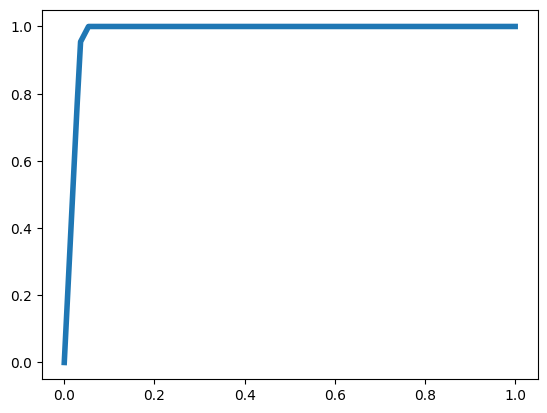

In [141]:
# retrain the model
best_model = DecisionTreeClassifier(**clf.best_params_).fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
y_pred_test_prob = best_model.predict_proba(X_test)[:, 1]

print('precision:', np.round(precision_score(y_test, y_pred_test), 3))
print('roc_auc:', np.round(roc_auc_score(y_test, y_pred_test_prob), 3))
print('log_loss:', np.round(log_loss(y_test, y_pred_test_prob), 3))
print('accuracy:', np.round(accuracy_score(y_test, y_pred_test), 3))
print('recall:', np.round(recall_score(y_test, y_pred_test), 3))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.show()

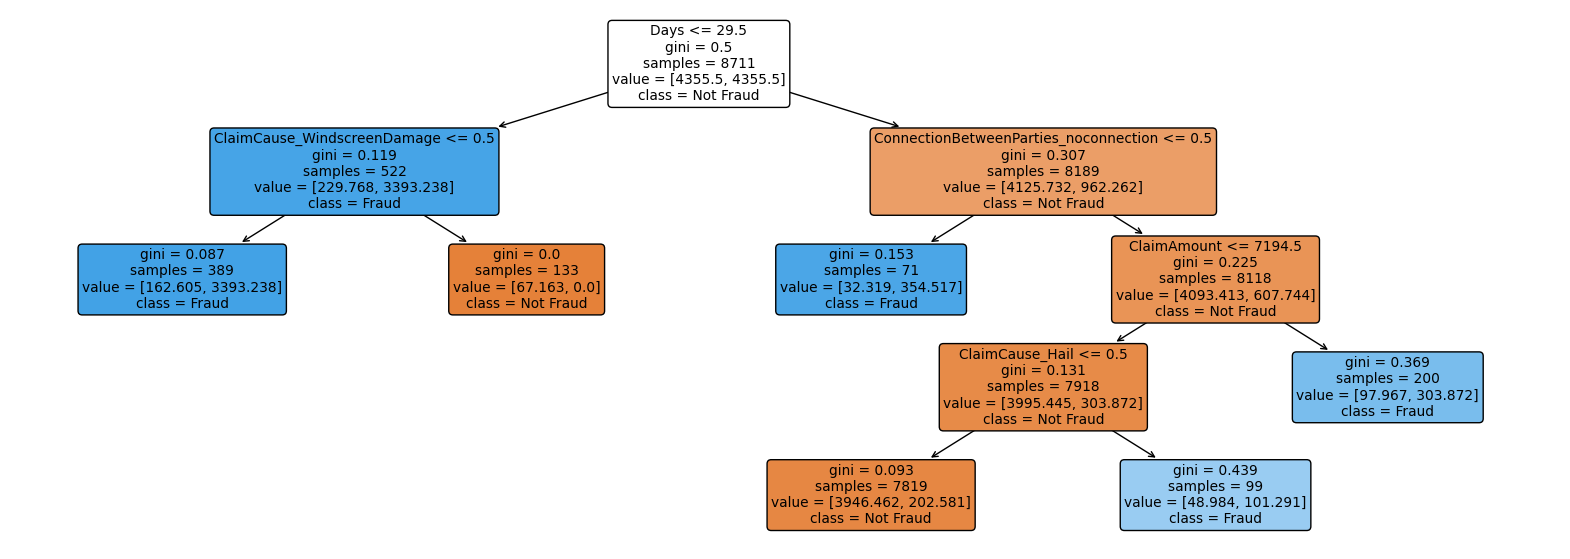

In [142]:
# Plot the tree
plt.figure(figsize=(20, 7))
plot_tree(best_model, feature_names=X_train.columns, filled=True, rounded=True, class_names=["Not Fraud","Fraud"])
plt.show()


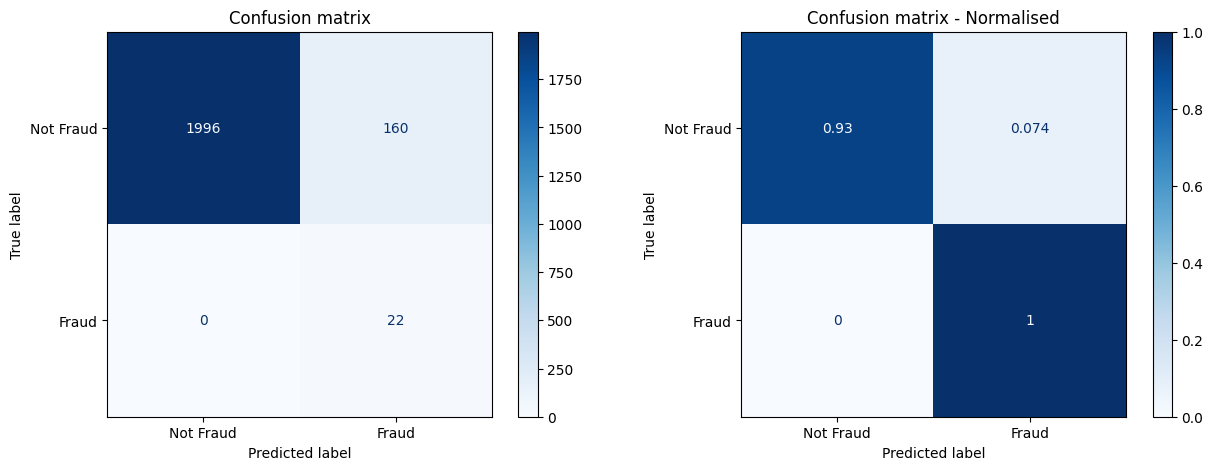

In [143]:
# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_test, y_pred_test, normalize=None, ax=axs[0], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[0].set_title('Confusion matrix')
disp.from_predictions(y_test, y_pred_test, normalize='true', ax=axs[1], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[1].set_title('Confusion matrix - Normalised')
plt.show()

In [144]:
# Final model
X_final = pd.concat([X_train, X_test], ignore_index=True)
y_final = pd.concat([y_train, y_test], ignore_index=True)

final_model = DecisionTreeClassifier(**clf.best_params_, random_state=42).fit(X_final, y_final)

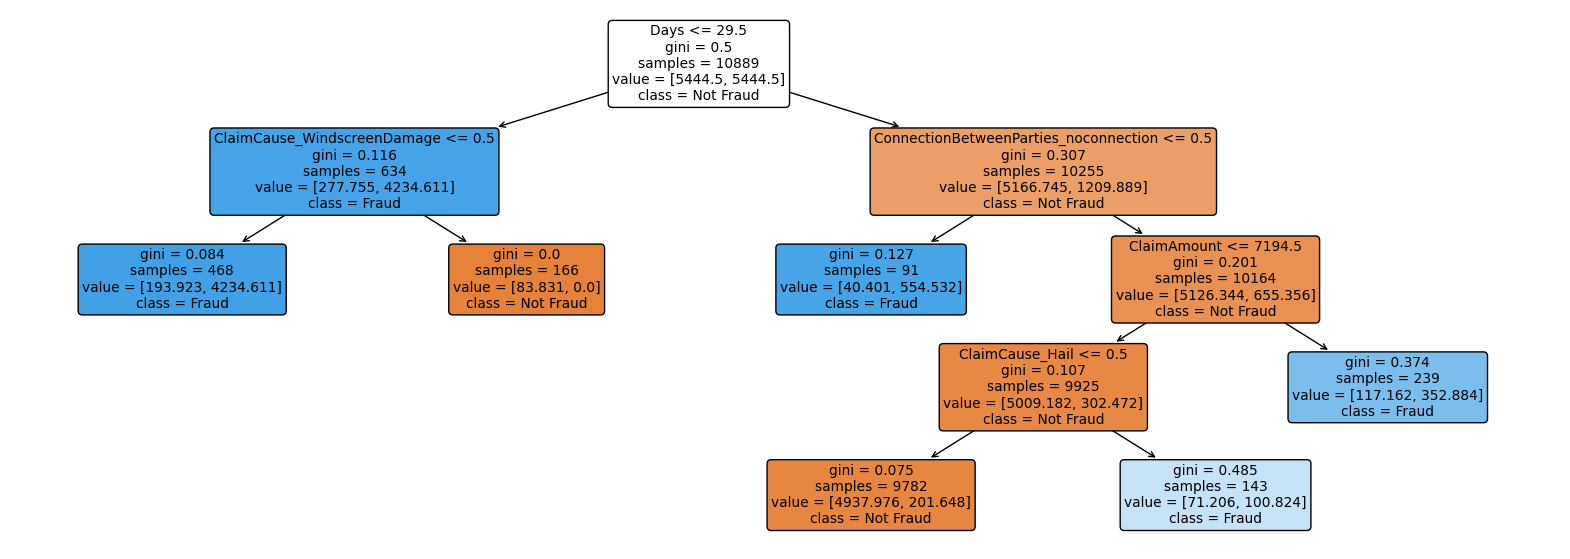

In [145]:
# Plot the final Decision tree model after retraining
plt.figure(figsize=(20, 7))
plot_tree(final_model, feature_names=X_train.columns, filled=True, rounded=True, class_names=["Not Fraud","Fraud"])
plt.show()

Calculate the detection rates and hit rates

In [146]:
len(y_pred_test)

2178

In [147]:
len(y_test)

2178

In [148]:
a = 0
b = 0
for i, o in zip(y_test, y_pred_test):
    if o == 1:
        a += 1
    if i == 1 & o == 1:
        b += 1

Decision_Tree_d = round((a / len(y_pred_test))*100, 2)
Decision_Tree_h = round((b / a)*100, 2)
        

In [149]:
Decision_Tree_d

8.36

In [150]:
Decision_Tree_h

12.09

In [151]:
df_result = pd.DataFrame({"y_hat": y_pred_test,
                          "y": y_test})

df_result.to_csv("dt_result.csv")

We decided to run the Random Forest model to see if we can improve the performance of the Decision Tree Model.

## Model 3 Random Forest

In [174]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [175]:
# Define parameters 
parameters = {
            'n_estimators': randint(100, 200),
            'max_depth': randint(5, 15),
            'class_weight': ['balanced']
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=345)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = parameters, 
                                 n_iter=40, 
                                 cv=3,
                                 random_state=42,
                                 scoring='roc_auc')

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=345),
                   n_iter=40,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff51a412530>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff553ad3940>},
                   random_state=42, scoring='roc_auc')

In [176]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'class_weight': 'balanced', 'max_depth': 11, 'n_estimators': 120}


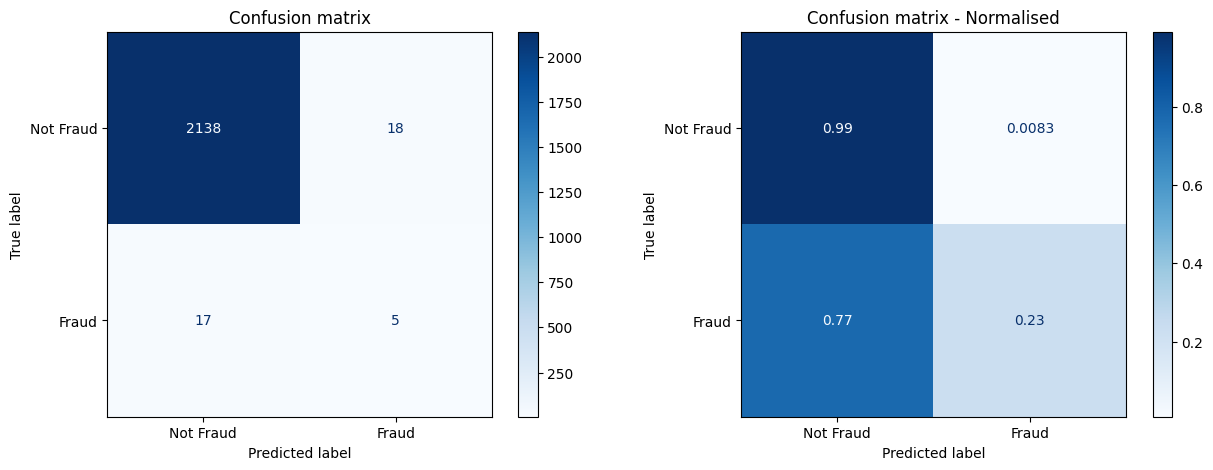

In [177]:
# Generate predictions with the best model
rf_y_pred = best_rf.predict(X_test)
rf_y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cm = confusion_matrix(y_test, rf_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_test, rf_y_pred, normalize=None, ax=axs[0], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[0].set_title('Confusion matrix')
disp.from_predictions(y_test, rf_y_pred, normalize='true', ax=axs[1], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[1].set_title('Confusion matrix - Normalised')
plt.show()

In [178]:
# Calculate the performance metrics
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred)

print('roc_auc:', np.round(roc_auc_score(y_test, rf_y_pred_prob), 3))
print('recall:', np.round(recall_score(y_test, rf_y_pred), 3))
print("Accuracy:", accuracy)
print("Precision:", precision)


roc_auc: 0.927
recall: 0.227
Accuracy: 0.9839302112029384
Precision: 0.21739130434782608


Calculate the hit rates and detection rates

In [179]:
len(rf_y_pred)

2178

In [180]:
len(y_test)

2178

In [181]:
a = 0
b = 0
for i, o in zip(y_test, rf_y_pred):
    if o == 1:
        a += 1
    if i == 1 & o == 1:
        b += 1

RF_d = round((a / len(rf_y_pred))*100, 2)
RF_h = round((b / a)*100, 2)

In [182]:
RF_h

21.74

In [183]:
RF_d

1.06

In [184]:
rf_result = pd.DataFrame({"y_hat": rf_y_pred,
                          "y": y_test})

rf_result.to_csv("rf_result.csv")

## Model 4 Neural Network

In [76]:
df_insurance_claims

,index,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,Days
0,0,CivilServant,CollisionWithAnimal,MaterialDamages ActLiability,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,198
1,1,Worker,LossOfControl,MaterialDamages ActLiability,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,552
2,2,Worker,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,696
3,3,CivilServant,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,711
4,4,Farmer,AccidentWithIdentifiedThirdParty,ActLiability,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,11525,Employee,WindscreenDamage,Windscreen,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,705
10885,11526,Employee,WindscreenDamage,Windscreen,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,1326
10886,11527,Employee,WindscreenDamage,Windscreen,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,166
10887,11528,CivilServant,WindscreenDamage,Windscreen,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,799


In [77]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            10889 non-null  int64  
 1   PolicyholderOccupation           10889 non-null  object 
 2   ClaimCause                       10889 non-null  object 
 3   ClaimInvolvedCovers              10889 non-null  object 
 4   FirstPartyVehicleType            10889 non-null  object 
 5   PolicyWasSubscribedOnInternet    10889 non-null  int64  
 6   NumberOfPoliciesOfPolicyholder   10889 non-null  int64  
 7   FpVehicleAgeMonths               10889 non-null  float64
 8   EasinessToStage                  10889 non-null  float64
 9   ClaimWihoutIdentifiedThirdParty  10889 non-null  int64  
 10  ClaimAmount                      10889 non-null  float64
 11  LossHour                         10889 non-null  float64
 12  PolicyHolderAge   

In [78]:
df_insurance_claims_NN = df_insurance_claims.drop(columns = ["ReferenceId", 
                                                             "PolicyholderNumber", 
                                                             "FirstPartyVehicleNumber",
                                                             "ThirdPartyVehicleNumber",
                                                             "InsurerNotes",
                                                             "DamageImportance",
                                                             "ConnectionBetweenParties",
                                                             "LossPostCode",
                                                             "PolicyHolderPostCode",
                                                             "LossDate",
                                                             "FirstPolicySubscriptionDate"])

KeyError: "['ReferenceId', 'PolicyholderNumber', 'FirstPartyVehicleNumber', 'ThirdPartyVehicleNumber', 'InsurerNotes', 'DamageImportance', 'ConnectionBetweenParties', 'LossPostCode', 'PolicyHolderPostCode', 'LossDate', 'FirstPolicySubscriptionDate'] not found in axis"

In [ ]:
df_insurance_claims_NN.info()

In [ ]:
df_insurance_claims_NN = df_insurance_claims_NN[(df_insurance_claims_NN.PolicyholderOccupation.notnull()) &
                                                (df_insurance_claims_NN.ClaimCause.notnull()) &
                                                (df_insurance_claims_NN.ClaimInvolvedCovers.notnull()) &
                                                (df_insurance_claims_NN.FirstPartyVehicleType.notnull()) &
                                                (df_insurance_claims_NN.FpVehicleAgeMonths.notnull()) &
                                                (df_insurance_claims_NN.LossHour.notnull()) & 
                                                (df_insurance_claims_NN.PolicyHolderAge.notnull())].reset_index()

In [ ]:
df_insurance_claims_NN.info()

In [ ]:
df_insurance_claims_NN["PolicyholderOccupation"] = pd.factorize(df_insurance_claims_NN.PolicyholderOccupation)[0]
df_insurance_claims_NN["ClaimCause"] = pd.factorize(df_insurance_claims_NN.ClaimCause)[0]
df_insurance_claims_NN["ClaimInvolvedCovers"] = pd.factorize(df_insurance_claims_NN.ClaimInvolvedCovers)[0]
df_insurance_claims_NN["FirstPartyVehicleType"] = pd.factorize(df_insurance_claims_NN.FirstPartyVehicleType)[0]

In [ ]:
df_insurance_claims_NN_final = df_insurance_claims_NN.drop(columns = ["index"])
df_insurance_claims_NN_final

In [ ]:
X = df_insurance_claims_NN_final.iloc[:,0:14]
y = df_insurance_claims_NN_final.iloc[:,14]

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.7, random_state=345)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=123)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Before Tuning the hyperparameter

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.01),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
log = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_valid, y_valid), , callbacks=[early_stopping_cb])

In [ ]:
model.summary()

In [ ]:
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "val loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "val_accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_predict = model.predict(X_test)
y_predict

### Tuning the hyperparameter

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
X = df_insurance_claims_NN_final.iloc[:,0:14]
y = df_insurance_claims_NN_final.iloc[:,14]

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.7, random_state=345)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=123)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
def train_model(hp):
    num_units = hp.Int('num_units', min_value = 1, max_value=20) 
    dropout_rate = hp.Float('dropout_rate', min_value = 0.2, max_value = 0.5)
    learning_rate = hp.Float('learning_rate', min_value = 0.01, max_value = 0.05, sampling = 'log')
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate = learning_rate),
                  loss='binary_crossentropy',
                  metrics = ["accuracy"])
    
    return model

In [ ]:
tuner = kt.Hyperband(train_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='logs',
                     project_name='NN_mdoel_final')    

In [ ]:
tuner.search(X_train, y_train, validation_data=(X_valid,y_valid))

In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]
print("Best number of hidden units:", best_hps['num_units'])
print("Best dropout rate:", best_hps['dropout_rate'])
print("Best learning rate:", best_hps['learning_rate'])

In [ ]:
best_model = tuner.hypermodel.build(best_hps)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
log = best_model.fit(X_train, y_train, epochs=30, batch_size = 50, validation_data=(X_valid,y_valid), callbacks=[early_stopping_cb])

In [ ]:
best_model.summary()

In [ ]:
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "val loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "val_accuracy")
plt.legend()
plt.show()

## Model 5 Nerual Network Autoencode

In [ ]:
df_insurance_claims_NNA = df_insurance_claims_NN_final.drop(columns = ["Fraud"])
df_insurance_claims_NNA 

In [ ]:
X = df_insurance_claims_NN_final.iloc[:,0:14]
y = df_insurance_claims_NN_final.iloc[:,0:14]

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.7, random_state=345)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=123)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
encoder = tf.keras.Sequential([tf.keras.layers.Dense(7, activation="relu")], name='encoder')

In [ ]:
decoder = tf.keras.Sequential([tf.keras.layers.Dense(14, activation="softmax")], name='decoder')

In [ ]:
autoencoder = tf.keras.Sequential([encoder,decoder])

In [ ]:
autoencoder.compile(optimizer='rmsprop',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
log = autoencoder.fit(x=X_train, y=X_train, epochs=50, batch_size=64, validation_data=(X_valid, X_valid), callbacks=[early_stopping_cb])

In [ ]:
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "val loss")
plt.legend()
plt.show()

In [ ]:
autoencoder.summary()